<a href="https://colab.research.google.com/github/pavan-kumar636/Food-delivery-Cost-and-Profit-Analysis/blob/main/Food_Delivery_Cost_and_Profit_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Delivery Cost and Profitability Analysis**

Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at understanding and optimizing the financial dynamics of a food delivery operation. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability.

Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

Importing the necessary Python libraries and the dataset:

In [2]:
import pandas as pd

df=pd.read_csv('/content/food_orders_new_delhi.csv')
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


**Data Cleaning**

Here I have removed duplicate rows(if any)

In [3]:
duplicate_rows=df.duplicated().sum()
print(f"The total duplicate rows are:{duplicate_rows}")


The total duplicate rows are:0


In [4]:
df.drop_duplicates()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order ID                 1000 non-null   int64         
 1   Customer ID              1000 non-null   object        
 2   Restaurant ID            1000 non-null   object        
 3   Order Date and Time      1000 non-null   datetime64[ns]
 4   Delivery Date and Time   1000 non-null   datetime64[ns]
 5   Order Value              1000 non-null   int64         
 6   Delivery Fee             1000 non-null   int64         
 7   Payment Method           1000 non-null   object        
 8   Discounts and Offers     1000 non-null   object        
 9   Commission Fee           1000 non-null   float64       
 10  Payment Processing Fee   1000 non-null   int64         
 11  Refunds/Chargebacks      1000 non-null   int64         
 12  discount_value           1000 non-n

# **Handling missing values.**
The columns 'Discounts and Offers' has some missing values but they are mentioned with 'Nan'. so i replaced it with 'None' for better understanding.

In [5]:
df['Discounts and Offers'].fillna('None', inplace=True)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


**Removing Outliers**

In [6]:
numerical_cols=df.select_dtypes(include=['float','int']).columns
numerical_cols=list(numerical_cols)
numerical_cols.remove('Order ID')
numerical_cols

['Order Value',
 'Delivery Fee',
 'Commission Fee',
 'Payment Processing Fee',
 'Refunds/Chargebacks']

In [7]:
def cap_outliers(series):
  lower_cap=series.quantile(0.01)
  upper_cap=series.quantile(0.99)
  return series.clip(lower_cap,upper_cap)

for col in numerical_cols:
  df[col]=cap_outliers(df[col])

In [8]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150.0,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198.0,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195.0,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146.0,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1974,30,Cash on Delivery,50 off Promo,130.0,50,0


Converting the columns 'Order Date and Time' and 'Delivery Date and Time' into datetime

In [9]:
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time']=pd.to_datetime(df['Delivery Date and Time'])
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150.0,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198.0,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195.0,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146.0,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1974,30,Cash on Delivery,50 off Promo,130.0,50,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   float64       
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), objec

# **Handling Inconsistent Data**
Identify inconsistencies (e.g., different formats, typos) and correct inconsistencies manually or using predefined rules. In our dataset, the discount and offers column has data inconsistencies, which makes it a challenge to calculate the exact discount amount.

In [11]:
def extract_discount(discount_str):
  if 'off' in discount_str:
    try:
      return float(discount_str.split(' ')[0]), 'fixed'
    except ValueError:
      return 0.0, 'none'

  elif '%' in discount_str:
    try:
      return float(discount_str.split('%')[0]), 'percentage'
    except ValueError:
      return 0.0, 'none'

  else:
    #no discount
    return 0.0, 'none'

# apply the function to create new 'Discount Percentage' and 'Discount Type' columns
df['discount_value'], df['discount_type']=zip(*df['Discounts and Offers'].apply(extract_discount))

# calculate the discount amount based on the order value and discount type
def calculate_dis_amount(row):
  if row['discount_type']=='percentage':
    return row['Order Value']*row['discount_value']/100
  elif row['discount_type']=='fixed':
    return row['discount_value']
  else:
    return 0.0

df['discount_amount']=df.apply(calculate_dis_amount,axis=1)



In [12]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount_value,discount_type,discount_amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150.0,47,0,5.0,percentage,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198.0,23,0,10.0,percentage,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195.0,45,0,15.0,percentage,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146.0,27,0,0.0,none,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1974,30,Cash on Delivery,50 off Promo,130.0,50,0,50.0,fixed,50.00


In [13]:
food_orders=df
food_orders[['Order Value','Discounts and Offers','discount_value','discount_amount']]

,Order Value,Discounts and Offers,discount_value,discount_amount
0,1914,5% on App,5.0,95.70
1,986,10%,10.0,98.60
2,937,15% New User,15.0,140.55
3,1463,None,0.0,0.00
4,1974,50 off Promo,50.0,50.00
...,...,...,...,...
995,825,5% on App,5.0,41.25
996,1627,None,0.0,0.00
997,553,None,0.0,0.00
998,1414,15% New User,15.0,212.10


# **Cost and Profitability Analysis**
For the cost analysis, consider the following costs associated with each order:

**Delivery Fee**: The fee charged for delivering the order.


**Payment Processing Fee**: The fee for processing the payment.


**Discount Amount:** The discount provided on the order.
We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. I calculated the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [14]:
# calculate total costs and revenue per order
food_orders['Total_costs']=food_orders['Delivery Fee']+food_orders['Payment Processing Fee']+food_orders['discount_amount']
food_orders['Revenue']=food_orders['Commission Fee']
food_orders['Profit']=food_orders['Revenue']-food_orders['Total_costs']

# aggregate data to get overall metrics
total_orders=food_orders.shape[0]
total_costs=food_orders['Total_costs'].sum()
total_revenue=food_orders['Revenue'].sum()
total_profit=food_orders['Profit'].sum()

Overall_metrics={
    "Total Orders":total_orders,
    "Total Costs":total_costs,
    "Totals Revenue":total_revenue,
    "Total Profit":total_profit
}

Overall_metrics

{'Total Orders': 1000,
 'Total Costs': 132743.7,
 'Totals Revenue': 126980.1,
 'Total Profit': -5763.599999999999}

Based on the analysis, here are the overall metrics for the food delivery operations:

Total Orders: 1,000

Total Revenue (from Commission Fees): 1,32,743 INR

Total Costs: 1,32,743.7 INR (including delivery fees, payment processing fees, and discounts)

Total Profit: -5763.599 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

In [15]:
food_orders[['Order Value','Total_costs','Revenue','Profit']].head()

,Order Value,Total_costs,Revenue,Profit
0,1914,142.70,150.0,7.30
1,986,161.60,198.0,36.40
2,937,215.55,195.0,-20.55
3,1463,77.00,146.0,69.00
4,1974,130.00,130.0,0.00


**To better understand the distribution of costs, revenue, and profit, let’s plot**:

A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
A bar chart to compare total revenue, total costs, and total profit

# **Histogram of profits per order**

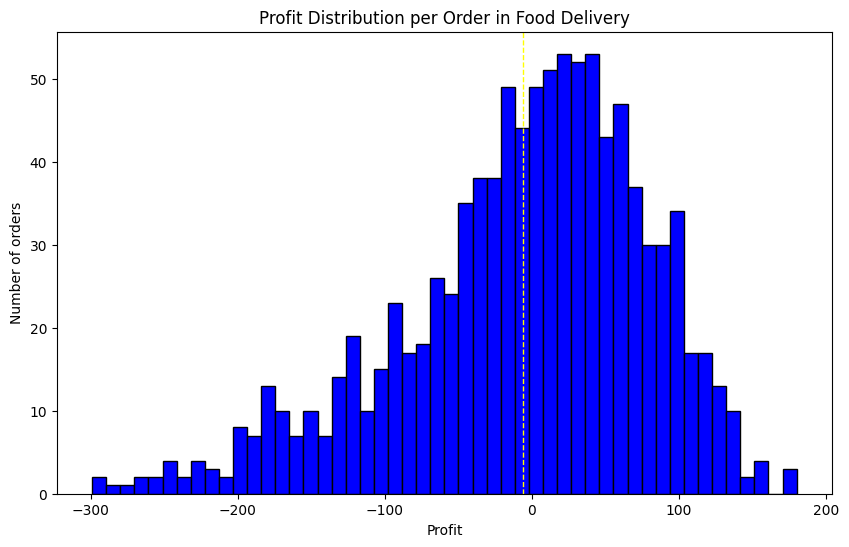

In [16]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10,6))
plt.hist(food_orders['Profit'], bins=50, color='blue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of orders')
plt.axvline(food_orders['Profit'].mean(), color='yellow', linestyle='dashed', linewidth=1)
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The yellow dashed line indicates the average profit, which is near to Zero but in the negative territory, highlighting the overall loss-making situation.

# **Pie chart for the proportion of total costs**
The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

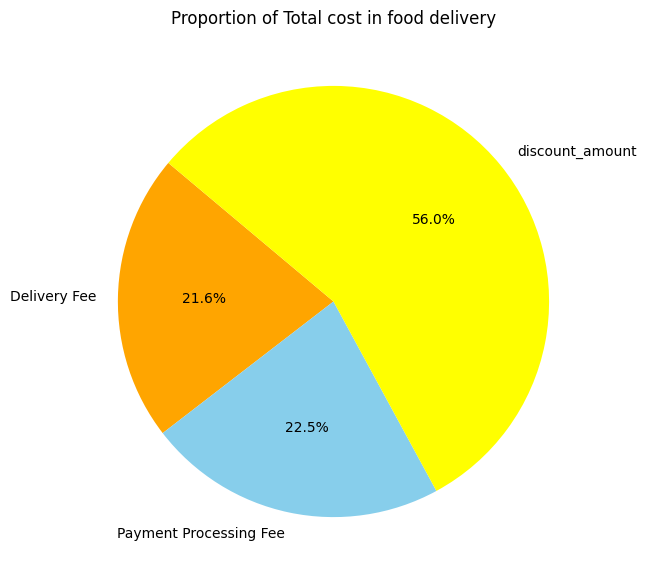

In [17]:
# pie chart for the proportion of total costs
cost_breakdown=food_orders[['Delivery Fee','Payment Processing Fee', 'discount_amount']].sum()
plt.figure(figsize=(7,7))
plt.pie(cost_breakdown, labels=cost_breakdown.index, autopct='%1.1f%%',startangle=140, colors=['orange','skyblue','yellow'])
plt.title('Proportion of Total cost in food delivery')
plt.show()

# **Bar chart for total revenue, costs, and profit**
The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

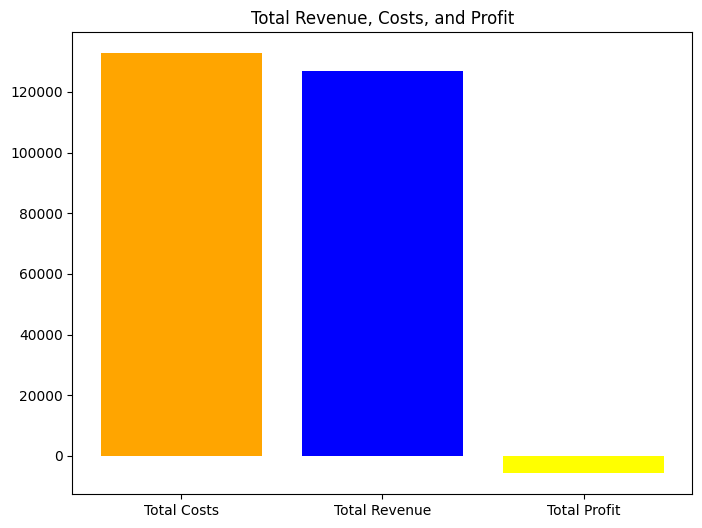

In [18]:
# bar chart for total revenue, costs, and profit
totals=['Total Costs','Total Revenue', 'Total Profit']
values=[total_costs,total_revenue,total_profit]
plt.figure(figsize=(8,6))
plt.bar(totals,values,color=['orange','blue','yellow'])
plt.title('Total Revenue, Costs, and Profit')
plt.show()

# **A New Strategy for Profits**
From the analysis so far we understood that the discounts on food orders are resulting into somewhat losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

A new average commission percentage based on profitable orders.
A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.
Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

The average commission percentage for profitable orders.
The average discount percentage for profitable orders.

In [19]:
profitable_orders=food_orders[food_orders['Profit']>0]

profitable_orders['Commission Percentage']=(profitable_orders['Commission Fee']/profitable_orders['Order Value'])*100
profitable_orders['Discount Percentage']=(profitable_orders['discount_amount']/profitable_orders['Order Value'])*100

avg_comission_per=profitable_orders['Commission Percentage'].mean()
avg_Discount_per=profitable_orders['Discount Percentage'].mean()

print(round(avg_comission_per))
print(round(avg_Discount_per))

28
6


<ipython-input-19-a9206d40823f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage']=(profitable_orders['Commission Fee']/profitable_orders['Order Value'])*100
<ipython-input-19-a9206d40823f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Discount Percentage']=(profitable_orders['discount_amount']/profitable_orders['Order Value'])*100


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:


New Average Commission Percentage: 28%
New Average Discount Percentage: 6%
The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 28% and a discount rate around 6% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
Simulate profitability per order using the recommended discounts (6%) and commissions (28%) to see the potential impact on profitability.
This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. Here’s how to visualize this comparison:

In [20]:
recommended_commision_fee = 28
recommended_discount_fee = 6

food_orders['simulated commision fee']=food_orders['Order Value']*(recommended_commision_fee/100)
food_orders['simulated discount fee']=food_orders['Order Value']*(recommended_discount_fee/100)

food_orders['Simulated_Total_costs']=food_orders['Delivery Fee']+food_orders['Payment Processing Fee']+food_orders['simulated discount fee']
food_orders['Simulated_profit']=food_orders['simulated commision fee']-food_orders['Simulated_Total_costs']

food_orders[['Total_costs','Profit','Simulated_Total_costs','Simulated_profit']].head()

,Total_costs,Profit,Simulated_Total_costs,Simulated_profit
0,142.70,7.30,161.84,374.08
1,161.60,36.40,122.16,153.92
2,215.55,-20.55,131.22,131.14
3,77.00,69.00,164.78,244.86
4,130.00,0.00,198.44,354.28


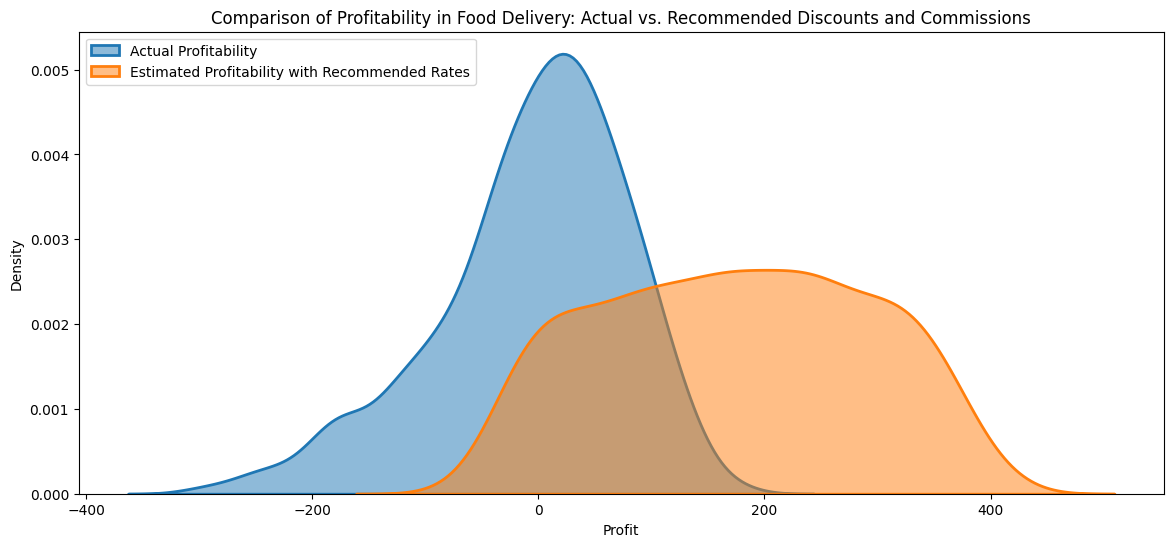

In [21]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.kdeplot(food_orders['Profit'],label='Actual Profitability',fill=True,alpha=0.5,linewidth=2)

sns.kdeplot(food_orders['Simulated_profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()